#  Fluctuating Binary Lattice Boltzmann Model

## Roadmap

My goal is to write the evolution equation for the moments of the kinetic equation in the form
\begin{equation}
\partial_t a_i(t) = -\sum_j L_{ij}a_j(t) ,
\end{equation}
where $L_{ij}$ is a constant square matrix with strictly positive eigenvalues. This can then be promoted to a Langevin equation
\begin{equation}
\partial_t a_i(t) = -\sum_j L_{ij}a_j(t) + \xi_i ,
\end{equation}
where $\xi_i$ is Gaussian noise with zero mean and covariance
\begin{equation}
\left\langle \xi_i(t) \xi_j^*(t') \right\rangle = \Xi_{ij}\delta(t-t') .
\end{equation}
By virtue of FDT, the noise matrix $\Xi_{ij}$ is fixed by
\begin{equation}
\Xi_{ij} =\sum_k \left( G_{ik}L^*_{jk} + L_{ik}G_{kj} \right) ,
\end{equation}
with the equilibrium correlations (_entropy matrix_)
\begin{equation}
G_{ij} = \left\langle a_i a^*_j \right\rangle .
\end{equation}
That is, if $L_{ij}$ can be obtained from the dynamics and $G_{ij}$ can be obtained from statistical physics (i.e., in terms of desired structure factors), we can determine the noise needed to produce the correct thermal fluctuations.

References: 
* Onsager and Machlup
* Fox and Uhlenbeck

Remarks:
* For lattice Boltzmann, we will have to discretize time, space, and velocities. Will the discretization change the properties of the operators, e.g., symmetry/reversibility? 
* I _believe_ discrete velocities will just turn integrals into sums, and both take the role of indices, so that should work.
* for modified equilibrium, I may want to work with the discrete basis anyway, to do the calculations
* I am not yet sure about integration along characteristics and correction terms for discrete time.
    * there could be subtle effects on cancellation between advection and forces, worthwhile to check and also to test numerically

Dicretization

\begin{equation}
\begin{split}
&\phantom{=}-\left(1-\frac{1}{2}\Lambda\right)^{-1}\left(\Lambda G + G \Lambda^T\right)\left[\left(1-\frac{1}{2}\Lambda\right)^{-1}\right]^T \\
&= -\Lambda_{LB} G \left(1+\frac{1}{2}\Lambda_{LB}\right)^T - \left(1+\frac{1}{2}\Lambda_{LB}\right) G \Lambda_{LB}^T \\
&= -\Lambda_{LB} G - G \Lambda_{LB}^T - \Lambda_{LB} G \Lambda_{LB}^T \\
&= G - \left(1+\Lambda_{LB}\right)G\left(1+\Lambda_{LB}\right)^T
\end{split}
\end{equation}


## Continuum kinetic equation

Consider the continuum kinetic equation

\begin{equation}
\left( \partial_t  + \vec{c}\cdot\nabla  \right) f^\sigma(\vec{r},\vec{c},t) = - \int \mathrm{d}\vec{c}' \Lambda(\vec{c},\vec{c}') \left[ f(\vec{r},\vec{c}',t)- f^\text{eq}(\rho, \vec{v}) \right] + \Phi .
\end{equation}

* We consider the linear integral collision operator $\int\mathrm{d}\vec{c}' \Lambda(\vec{c},\vec{c}')$.
* Acceleration/forces $\vec{a}\cdot\nabla_{\vec{c}} f$ are formally included in $\Phi$.
* Note that this is only apparently linear because $f^\text{eq}$ and $\Phi$ can be non-linear functions of $f$.

Consider the eigenfunctions $T_k(\vec{c})$ (_modes_) of the collision kernel with eigenvalues $\lambda_k$:
\begin{equation}
\Lambda(\vec{c},\vec{c}') = \sum_a \lambda_a \frac{\omega(\vec{c})}{N_a} T_a(\vec{c}) T_a(\vec{c}')
\end{equation}

The eigenfunctions are othogonal and complete:
\begin{equation}
\int \mathrm{d}\vec{c} \, \omega(\vec{c}) T_a(\vec{c}) T_b(\vec{c}) = N_a \delta_{ab}
\end{equation}

\begin{equation}
\sum_a \frac{\omega(\vec{c})}{N_a} T_a(\vec{c}) T_a(\vec{c}') = \delta(\vec{c}-\vec{c}')
\end{equation}

Define the (velocity) moments $m_a$ of the distribution function $f$ for the modes $T_a$:
\begin{equation}
m_a(\vec{r},t) = \int \mathrm{d}\vec{c} \, T_a(\vec{c}) f(\vec{r},\vec{c},t)
\end{equation}

By virtue of orthogonality and completeness, we can expand the distribution functions:
\begin{equation}
f(\vec{r},\vec{c},t) = \sum_a \frac{\omega(\vec{c})}{N_a} T_a(\vec{c}) m_a(\vec{r},t)
\end{equation}

Note: The modes are related to independent components of the _Hermite polynomials_.

## First step: Write the evolution equation in terms of moments

Integrate the evolution equation for $f$ over $\int\mathrm{d}\vec{c}\,T_a(\vec{c})$ and plug in the expansions for $f$ and $\Lambda(\vec{c},\vec{c}')$.

\begin{equation}
\partial_t m_a(\vec{r},t) + \sum_b \int\mathrm{d}\vec{c} \, \frac{\omega(\vec{c})}{N_b} T_a(\vec{c}) T_b(\vec{c}) \left( \vec{c}\cdot\nabla  \right) m_b(\vec{r},t) = - \lambda_a \left[ m_a(\vec{r},t)- m_a^\text{eq}(\rho, \vec{v}) \right] + \Phi_a
\end{equation}

\begin{equation}
\partial_{ab} = \int\mathrm{d}\vec{c} \, \frac{\omega(\vec{c})}{N_b} T_a(\vec{c}) T_b(\vec{c}) \left( \vec{c}\cdot\nabla  \right)
\end{equation}

## Next step: Linearize

Consider perturbations around equilibrium state at rest
\begin{equation}
\delta f(\vec{r},\vec{c},t) = f(\vec{r},\vec{c},t) - f^{\text{eq}}(\rho_0,0) .
\end{equation}

A useful linearization of the kinetic equation can be written in terms of a projection operator $\mathsf{P}$ defined in such a way that
\begin{align}
\mathsf{P} f &= \mathsf{P} f^{\text{eq}} \\%\int\mathrm{d}\vec{c}' P(\vec{c},\vec{c}) f(\vec{c}') , \\
\mathsf{P} \Phi &= \int\mathrm{d}\vec{c}'\, K(\vec{r},\vec{c},\vec{c}') f(\vec{c}') \\
\end{align}
where the linear forcing kernel $K(\vec{r},\vec{c},\vec{c}')$ is yet to be determined. 

Subtracting the equilibrium average from the kinetic equation, we arrive at the linearized kinetic equation
\begin{equation}
\begin{split}
\left( \partial_t  + \vec{c}\cdot\nabla  \right)\delta f^\sigma(\vec{r},\vec{c},t) 
&= - \int \mathrm{d}\vec{c}' \Lambda^P(\vec{c},\vec{c}') \left[ \delta f(\vec{r},\vec{c}',t) - \delta f^{\text{eq}}(\rho,\vec{v}) \right] + \int\mathrm{d}\vec{c}'\,K(\vec{c},\vec{c}') \delta f(\vec{r},\vec{c}',t) ,
\end{split}
\end{equation}
where the right-projected collision kernel $\Lambda^P(\vec{c},\vec{c}')=\int\mathrm{d}\vec{c}'' \Lambda(\vec{c},\vec{c}'')\left[\delta(\vec{c}''-\vec{c}') - P(\vec{c}'',\vec{c}')\right]$.

* Note that we allow a perturbation $\delta f^{\text{eq}}$ to accommodate models with a modified equilibrium distribution.

## Next step: Fourier transform

\begin{align}
\tilde{f}(\vec{k}) &= \frac{1}{(2\pi)^{D/2}} \int\mathrm{d}\vec{r} f(\vec{r})\exp\left(-i\vec{k}\cdot\vec{r}\right) &
f(\vec{r}) &= \frac{1}{(2\pi)^{D/2}} \int\mathrm{d}\vec{k} \tilde{f}(\vec{k})\exp\left(i\vec{k}\cdot\vec{r}\right)
\end{align}

The linearized kinetic equation in Fourier space is

\begin{equation}
\partial_t \delta\tilde{f}(\vec{k},\vec{c},t) + \int\mathrm{d}\vec{c}'\, A(\vec{k},\vec{c},\vec{c}') \delta \tilde{f}(\vec{k},\vec{c}',t) = - \int \mathrm{d}\vec{c}' \Lambda^P(\vec{c},\vec{c}') \left[ \delta \tilde{f}(\vec{k},\vec{c}',t) - \delta \tilde{f}^{\text{eq}}(\vec{k})) \right] + \int\mathrm{d}\vec{c}'\,\tilde{K}(\vec{k},\vec{c},\vec{c}') \delta \tilde{f}(\vec{k},\vec{c}',t) ,
\end{equation}

where the advection kernel is $$A(\vec{k},\vec{c},\vec{c}')=i\,\vec{k}\cdot\vec{c}\,\delta(\vec{c}-\vec{c}').$$

The linearized equation can equally well be written in moment space

\begin{equation}
\partial_t \delta\tilde{m}_a(\vec{k},t) + \sum_b A_{ab}(\vec{k}) \delta\tilde{m}_b(\vec{k},t) = - \sum_b \Lambda_{ab} \left[ \delta\tilde{m}_b(\vec{k},t)- \delta\tilde{m}_b^\text{eq}(\vec{k}) \right] + \sum_b K_{ab}(\vec{k},t) \delta \tilde{m}_b(\vec{k},t) ,
\end{equation}

where
\begin{align}
\Lambda_{ab} &= \lambda_a\delta_{ab} \\
A_{ab}(\vec{k}) &= \tilde{\partial}_{ab}(\vec{k}) = \int\mathrm{d}\vec{c} \, \frac{\omega(\vec{c})}{N_b} T_a(\vec{c}) T_b(\vec{c}) \left( i\vec{k}\cdot\vec{c} \right) \\
K_{ab}(\vec{k}) &= \int\mathrm{d}\vec{c}\int\mathrm{d}\vec{c}'\,\frac{\omega(\vec{c}')}{N_b} T_a(\vec{c})T_b(\vec{c}') K(\vec{k},\vec{c},\vec{c}')
\end{align}

Observation:
* The equation for $f(\vec{c})$ diagonalizes the advection operator $A(\vec{k},\vec{c},\vec{c}')=i\,\vec{k}\cdot\vec{c}\,\delta(\vec{c}-\vec{c}')$.
* The equation for $m_a$ diagonalizes the collision operator $\Lambda_{ab}=\lambda_a\delta_{ab}$.
* The forcing term is not diagonal in either representation.

### One more thing...

The $\delta\tilde{m}^{\text{eq}}(\vec{k})$ still prevent writing directly a linearized Langevin equation. For the modified equilibrium models, they can eventually be expressed in terms of $\delta\tilde{m}(\vec{k})$ (linear combinations). We can write this formally as $\delta\tilde{m}^{\text{eq}}_b(\vec{k}) = \sum_c E_{bc} \delta\tilde{m}(\vec{k})$, such that the dynamic equation becomes

\begin{equation}
\begin{split}
\partial_t \delta\tilde{m}_a(\vec{k},t) = - \sum_b A_{ab}(\vec{k}) \delta\tilde{m}_b(\vec{k},t) - \sum_b \Lambda_{ab} \delta\tilde{m}_b(\vec{k},t) + \sum_{b,c} \Lambda_{ac}E_{cb} \delta\tilde{m}_b(\vec{k}) + \sum_b K_{ab}(\vec{k},t) \delta \tilde{m}_b(\vec{k},t) .
\end{split}
\end{equation}

Hence we get the desired form 

\begin{equation}
\partial_t \delta\tilde{m}_a(\vec{k},t) = - \sum_b L_{ab} \delta\tilde{m}_b(\vec{k},t)
\end{equation}

with the time evolution operator

\begin{equation}
L_{ab} = A_{ab}(\vec{k}) + \Lambda_{ab} - \sum_{c} \Lambda_{ac}E_{cb} - K_{ab}(\vec{k},t) .
\end{equation}

* Note: Some of the terms involve interactions between species leading to convolutions in $k$-space such that $L_{ab}$ is actually not diagonal in $\vec{k}$, i.e., it has a more general form $\mathcal{L}_{ab}^{\sigma\sigma'}(\vec{k},\vec{k}')$.
* This is not an issue because the modes, species, and wavevectors all take the role of indices in the linear Langevin equation:

\begin{equation}
\partial_t \delta\tilde{m}_a^\sigma(\vec{k},t) = - \sum_{b,\sigma'} \int\mathrm{d}\vec{k}' \, \mathcal{L}_{ab}^{\sigma\sigma'}(\vec{k},\vec{k}') \delta\tilde{m}_b^{\sigma'}(\vec{k}',t) + \tilde{\xi}_a^\sigma(\vec{k},t)
\end{equation}

\begin{equation}
\Xi_{ab}^{\sigma\sigma'}(\vec{k},\vec{k}') = \sum_{c,\zeta}\int\mathrm{d}\vec{q} \left[ \mathcal{G}_{ac}^{\sigma\zeta}(\vec{k},\vec{q})\mathcal{L}_{bc}^{\sigma'\zeta}(-\vec{k}',-\vec{q})+\mathcal{L}_{ac}^{\sigma\zeta}(\vec{k},\vec{q})\mathcal{G}_{cb}^{\zeta\sigma'}(\vec{q},\vec{k}') \right]
\end{equation}

## Equilibrium Correlations

Suppose we have a phase-space density defined by
\begin{equation}
F(\vec{r},\vec{c},t) = \mu \sum_i \delta(\vec{r}-\vec{r}_i(t))\delta(\vec{c}-\vec{c}_i(t))
\end{equation}
with some parameter $\mu$ (same for all particles).

* the parameter $\mu$ will be determined to ensure consistency with structure factors

Remark: The definition implies
\begin{equation}
\int\mathrm{d}\vec{r} \int\mathrm{d}\vec{c} \, F(\vec{r},\vec{c},t) = \mu N .
\end{equation}

The average value of $F$ in a phase-space volume can be obtained by integrating $F$ weighted by the $N$-particle distribution  $f_N$
\begin{equation}
\left\langle F(\vec{r},\vec{c},t) \right\rangle = \int \Pi\mathrm{d}\vec{r}_i \int \Pi\mathrm{d}\vec{c}_i f_N F(\vec{r},\vec{c},t) = \mu f_1(\vec{r},\vec{c},t)
\end{equation}

where $f_1$ is the one-particle distribution function defined in the usual way. We can interpret $\mu f_1(\vec{r},\vec{c},t)$ as the ensemble average that approaches the equilibrium distribution $\mu f^{\text{eq}}(\vec{r},\vec{c})$ in the limit $t\rightarrow\infty$, and $F(\vec{r},\vec{c},t)$ is the fluctuating distribution function. The fluctuations around equilibrium are $$\delta f(\vec{r},\vec{c}) = F(\vec{r},\vec{c}) - \mu f^{\text{eq}}(\vec{r},\vec{c}) .$$

For the average of the second moment of $F$, we have
\begin{equation}
\left\langle F(\vec{r},\vec{c},t) F(\vec{r},\vec{c},t') \right\rangle = \mu^2 f_1(\vec{r},\vec{c},t)\delta(\vec{r}-\vec{r}')\delta(\vec{c}-\vec{c}')\delta(t-t') + \mu^2 f_2(\vec{r},\vec{r}',\vec{c},\vec{c}',t,t') .
\end{equation}

We will assume that in the limit $t\rightarrow\infty$, there are no higher-order correlations and $f_2^{\text{eq}}(\vec{r},\vec{r}',\vec{c},\vec{c}',t,t') = f^{\text{eq}}(\vec{r},\vec{c}) f^{\text{eq}}(\vec{r}',\vec{c}') g(\vec{r},\vec{r}') \delta(t-t')$. 

The equilibrium correlations can then be written

\begin{equation}
\left\langle \delta f(\vec{r},\vec{c}) \delta f(\vec{r}',\vec{c}') \right\rangle = \mu^2 f^{\text{eq}}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}')\delta(\vec{c}-\vec{c}') + \mu^2 f^{\text{eq}}(\vec{r},\vec{c}) f^{\text{eq}}(\vec{r}',\vec{c}') \left[ g(\vec{r},\vec{r}') - 1 \right] .
\end{equation}

For a multicomponent system, this can be generalized to

\begin{equation}
\left\langle \delta f^\sigma(\vec{r},\vec{c}) \delta f^{\sigma'}(\vec{r}',\vec{c}') \right\rangle = \mu^2 f^{\text{eq},\sigma}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}')\delta(\vec{c}-\vec{c}')\delta_{\sigma\sigma'} + \mu^2 f^{\text{eq},\sigma}(\vec{r},\vec{c}) f^{\text{eq},\sigma'}(\vec{r}',\vec{c}') \left[ g^{\sigma\sigma'}(\vec{r},\vec{r}') - 1 \right] .
\end{equation}

\begin{equation}
\left\langle \delta m^\sigma_a(\vec{r}) \delta m^{\sigma'}_b(\vec{r'}) \right\rangle = \mu^2 \int\mathrm{d}\vec{c}\,T_a(\vec{c})T_b(\vec{c}) f^{\text{eq},\sigma}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}')\delta_{\sigma\sigma'} + {m}^{\text{eq},\sigma}_a(\vec{r}) {m}^{\text{eq},\sigma'}_b(\vec{r}') \left[ g^{\sigma\sigma'}(\vec{r},\vec{r}') - 1 \right] .
\end{equation}


* generalize this to modified equilibrium

\begin{align}
\left\langle \delta f(\vec{r},\vec{c})\delta f(\vec{r}',\vec{c}') \right\rangle &= \mu^2 f^{\text{eq}}(\vec{r},\vec{c})\delta(\vec{c}-\vec{c}')\delta(\vec{r}-\vec{r}') + \mu^2 f^{\text{eq}}(\vec{r},\vec{c}) f^{\text{eq}}(\vec{r}',\vec{c}') \gamma^{ff}(\vec{r},\vec{r}') \\
\left\langle \delta h(\vec{r},\vec{c})\delta h(\vec{r}',\vec{c}') \right\rangle &= \chi^2 h^{\text{eq}}(\vec{r},\vec{c})\delta (\vec{c}-\vec{c}')\delta(\vec{r}-\vec{r}') + \chi^2 h^{\text{eq}}(\vec{r},\vec{c}) h^{\text{eq}}(\vec{r}',\vec{c}') \gamma^{hh}(\vec{r},\vec{r}') \\
\left\langle \delta f(\vec{r},\vec{c})\delta h(\vec{r}',\vec{c}') \right\rangle &=  \mu\chi f^{\text{eq}}(\vec{r},\vec{c}) h^{\text{eq}}(\vec{r}',\vec{c}') \gamma^{fh}(\vec{r},\vec{r}')
\end{align}


* three independent pair corrleation functions 
* these come from thermodynamics
* due to self-consistent condition, they do not enter the noise covariances

For the density part:

\begin{equation}
S(\vec{r},\vec{r}') = \left\langle \delta m_0(\vec{r}) \delta m_0(\vec{r'}) \right\rangle = \mu \bar{m}_0(\vec{r}) \delta(\vec{r}-\vec{r}') + \bar{m}_0(\vec{r})\bar{m}_0(\vec{r}') \left[ g(\vec{r},\vec{r}') - 1 \right] .
\end{equation}

\begin{equation}
 g(\vec{r},\vec{r}') - 1 = \frac{S(\vec{r},\vec{r}') - \mu \bar{m}_0(\vec{r}) \delta(\vec{r}-\vec{r}')}{\bar{m}_0(\vec{r})\bar{m}_0(\vec{r}')} .
\end{equation}

In Fourier space

\begin{equation}
\left\langle \delta f^\sigma(\vec{k},\vec{c}) \delta f^{\sigma'}(\vec{k}',\vec{c}') \right\rangle = \mu^2 f^{\text{eq}}(\vec{k}+\vec{k}',\vec{c})\delta(\vec{c}-\vec{c}')\delta_{\sigma\sigma'} + \mu^2 \left( f^{\text{eq},\sigma}(\vec{c})f^{\text{eq},\sigma'}(\vec{c}') \phantom{}_*^* \gamma^{\sigma\sigma'} \right) (\vec{k},\vec{k}')
\end{equation}

\begin{equation}
\left\langle \delta m^\sigma_a(\vec{k}) \delta m^{\sigma'}_b(\vec{k'}) \right\rangle = \mu^2 \int\mathrm{d}\vec{c}\,T_a(\vec{c})T_b(\vec{c}) f^{\text{eq},\sigma}(\vec{k}+\vec{k}',\vec{c})\delta_{\sigma\sigma'} + \left( {m}^{\text{eq},\sigma}_a {m}^{\text{eq},\sigma'}_b \phantom{}_*^* \gamma^{\sigma\sigma'} \right) (\vec{k},\vec{k'})
\end{equation}

\begin{equation}
S(\vec{k},\vec{k}') = \left\langle \delta m_0(\vec{k}) \delta m_0(\vec{k}') \right\rangle = \mu \bar{m}_0(\vec{k}+\vec{k}') + \left( \bar{m}_0 \bar{m}_0 \phantom{}_*^* \gamma \right) (\vec{k},\vec{k'})
\end{equation}

\begin{equation}
\left( \bar{m}_0 \bar{m}_0 \phantom{}_*^* \gamma \right) (\vec{k},\vec{k'}) = S(\vec{k},\vec{k}') - \mu \bar{m}_0(\vec{k}+\vec{k}') 
\end{equation}

* once structure factor and equilibrium are specified, we can calculate the correlation of any two modes
* from here on, things will depend on the definition of $f^{\text{eq}}$ $\rightarrow$ crucial for modified equilibrium models

Consistency requirement:

\begin{equation}
\left\langle \delta j_a(\vec{r}) \delta j_b(\vec{r'}) \right\rangle = \mu^2 \int\mathrm{d}\vec{c}\,c_a c_b f^{\text{eq}}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}') \overset!= \rho_0 k_B T \delta_{ab} %+ {m}^{\text{eq}}_a(\vec{r}) {m}^{\text{eq}}_b(\vec{r}') \left[ g^{\sigma\sigma'}(\vec{r},\vec{r}') - 1 \right] .
\end{equation}

\begin{equation}
\left\langle \delta j_a(\vec{k}) \delta j_b(\vec{k'}) \right\rangle = \mu \int\mathrm{d}\vec{c} \, c_a c_b f^{\text{eq},\sigma}(\vec{k}+\vec{k}',\vec{c}) % \overset!= \rho_0 k_B T \delta_{ab}
\Rightarrow 
\mu = \frac{\rho_0 k_B T}{\mu\int\mathrm{d}\vec{c}\, c_a^2 f^{\text{eq}}(\vec{r},\vec{c})}
\end{equation}

Standard Maxwellian:

\begin{equation}
\left\langle \delta j_a(\vec{r}) \delta j_b(\vec{r'}) \right\rangle = \mu \rho_0 c_s^2 \delta_{ab} \overset!= \rho_0 k_B T \delta_{ab}
\Rightarrow 
\mu = \frac{k_BT}{c_s^2} = \frac{S}{\rho_0}
\end{equation}

Generalize to:

\begin{equation}
S(\vec{k}) = \frac{\rho_0 k_BT}{c_s^2(\vec{k})}
\Rightarrow
\mu(\vec{k}) = \frac{k_BT}{c_s^2(\vec{k})} = \frac{S(\vec{k})}{\rho_0}
\end{equation}

\begin{equation}
??? \mu(\vec{k},\vec{k}') = \frac{S(\vec{k},\vec{k}')}{\bar{m}_0(\vec{k}+\vec{k}')} ???
\end{equation}

* TODO: needs some more thought here, but with homogeneous reference state we'd have something that leads to

\begin{equation}
\left\langle \delta f(\vec{k},\vec{c}) \delta f(-\vec{k},\vec{c}') \right\rangle = \frac{S(\vec{k})}{\rho_0} f^{\text{eq}}(\vec{k},\vec{c})\delta(\vec{c}-\vec{c}')
\end{equation}

#### How to promote this to $\rho_t$ and $\phi$...?

* If we know the equilibrium correlations, it should not matter what variables are used (i.e., component densities or total density and order parameter). I think the linear Langevin equation can be applied to both equally.
* Once we have the linear dynamics and the equilibrium correlations, I think everything can be written down for the free e energy model. So that should suffice to press ahead with the implementation.

## Fluctuating Binary LBM

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset
yt.set_log_level(50)

In [74]:
import sympy as sp
from lbmpy.stencils import LBStencil, Stencil
from lbmpy.moments import MOMENT_SYMBOLS, moment_matrix

In [75]:
d2q9 = LBStencil(Stencil.D2Q9)
Q = len(d2q9)
c = sp.Matrix(d2q9)
cs = sp.sqrt(sp.Rational(1,3))

w = [ sp.Rational(4,9) ] + [ sp.Rational(1,9) ]*4 + [ sp.Rational(1,36) ]*4

x, y, z = MOMENT_SYMBOLS
one = sp.core.sympify(1)
c2 = x**2 + y**2
c4 = c2**2

moments = [
    one,
    x,
    y,
    3*c2-2,
    2*x**2-c2,
    x*y,
    (3*c2-4)*x,
    (3*c2-4)*y,
    9*c4-15*c2+2
]

M = moment_matrix(moments, stencil=d2q9)

N = [ sum([w[i]*M[a,i]**2 for i in range (Q)]) for a in range(Q) ]

In [76]:
rho = sp.symbols('rho', cls=sp.Function, real=True)(x,y,z)
phi = sp.symbols('phi', cls=sp.Function, real=True)(x,y,z)
ux, uy, uz = sp.symbols('u_x, u_y, u_z', real=True)
pb = sp.symbols('p_b', real=True)
mu = sp.symbols('mu_phi', real=True, cls=sp.Function)(rho,phi)
kappa = sp.symbols('kappa', real=True)
Gamma = sp.symbols('Gamma_phi', real=True)
k = sp.symbols('k', real=True)
kB, T = sp.symbols('k_B T', real=True)
kT = sp.symbols('k_{B}T', real=True)

rho0, phi0 = sp.symbols('\\hat{\\rho}_0 \\hat{\\phi}_0', real=True, constant=True)
drho, dphi = sp.symbols('\\delta\\hat{\\rho} \\delta\\hat{\\phi}', real=True)

u = sp.Matrix([ux,uy])
Drho2 = sp.Matrix([ [ sp.Derivative(rho,a)*sp.Derivative(rho,b) for b in [x,y] ] for a in [x,y] ])
D2rho = sum([ sp.Derivative(rho,a,2) for a in [x,y] ])
G = kappa*Drho2

one12 = sp.Rational(1,12)
one18 = sp.Rational(1,18)
one72 = sp.Rational(1,72)

ww =  [ [[0]*2]*2 ] \
    + [ [ [  -one18, 0 ], [ 0, 2*one18 ] ] ]*2 \
    + [ [ [ 2*one18, 0 ], [ 0,  -one18 ] ] ]*2 \
    + [ [ [ -one72, -one12 ], [ -one12, -one72 ] ],
        [ [ -one72,  one12 ], [  one12, -one72 ] ],
        [ [ -one72,  one12 ], [  one12, -one72 ] ],
        [ [ -one72, -one12 ], [ -one12, -one72 ] ] ]

def f(i):
    f = w[i]/cs**2*pb \
        + w[i]/cs**2*rho*c[i,:].dot(u) \
        + w[i]/(2*cs**4)*rho*u.dot((c[i,:].T@c[i,:]-cs**2*sp.eye(2))@u) \
        - w[i]/cs**2*(kappa*rho*D2rho) \
        + sum([ ww[i][j][j]/cs**2*G[j,j] for j in range(2) ]) \
        + sum([ ww[i][j][(j+1)%2]/cs**2*G[j,(j+1)%2] for j in range(1) ])
    return f

feq = sp.Matrix([ f(i) for i in range(Q) ])
feq[0] = rho - sum(feq[1:])

In [77]:
cs = sp.symbols('c_s', cls=sp.Function, real=True)(k)

# advection operator
A = sp.diag(*[ sp.I*c[i,:]@sp.Matrix(sp.symbols('k_x, k_y', real=True)) for i in range(Q) ])
A = M@A@M.inv()

# collision operator
lb, ls, lo, le = sp.symbols('lambda_b lambda_s lambda_o lambda_e', real=True)
lambdas = [0]*3 + [lb] + [ls]*2 + [lo]*2 + [lb]
Lambda = sp.diag(*lambdas)
Lambda[3,0] = -6*(cs**2 - sp.Rational(1,3))*lambdas[3]
Lambda[-1,0] = -Lambda[3,0]

# time evolution operator
L = A + Lambda

In [78]:
fbar = feq.subs({pb:rho0*cs**2,rho:rho0,ux:0,uy:0})
G = sp.symbols('S', cls=sp.Function)(k)/rho0*sp.diag(*fbar)
G = sp.simplify(M@G@M.T)
assert(sp.simplify(A@G + G@A.adjoint()) == sp.zeros(Q,Q))

In [79]:
Xi = sp.expand(L@G + G@L.adjoint())
assert(Xi==Xi.T)
sp.simplify(Xi)

Matrix([
[0, 0, 0,                                            0,                           0,                           0,                         0,                         0,                                            0],
[0, 0, 0,                                            0,                           0,                           0,                         0,                         0,                                            0],
[0, 0, 0,                                            0,                           0,                           0,                         0,                         0,                                            0],
[0, 0, 0, 24*lambda_b*(2 - 3*c_s(k)**2)*S(k)*c_s(k)**2,                           0,                           0,                         0,                         0, 24*lambda_b*(3*c_s(k)**2 - 1)*S(k)*c_s(k)**2],
[0, 0, 0,                                            0, 8*lambda_s*S(k)*c_s(k)**2/3,                           0,                  

* This agrees with literature, cf. Eq. (58) in "Langevin theory of ﬂuctuations in the discrete Boltzmann equation"

### D3Q19 model

In [80]:
d3q19 = LBStencil(Stencil.D3Q19)
Q = len(d3q19)
c = sp.Matrix(d3q19)
cs = sp.sqrt(sp.Rational(1,3))

w = [ sp.Rational(1,3) ] + [ sp.Rational(1,18) ]*6 + [ sp.Rational(1,36) ]*12

x, y, z = MOMENT_SYMBOLS
one = sp.core.sympify(1)
c2 = x**2+y**2+z**2
c4 = c2**2

moments = [
    one,
    x,
    y,
    z,
    c2-1,
    3*x**2-c2,
    y**2-z**2,
    x*y,
    y*z,
    z*x,
    (3*c2-5)*x,
    (3*c2-5)*y,
    (3*c2-5)*z,
    (y**2-z**2)*x,
    (z**2-x**2)*y,
    (x**2-y**2)*z,
    3*c4-6*c2+1,
    (2*c2-3)*(3*x**2-c2),
    (2*c2-3)*(y**2-z**2)
]

M = moment_matrix(moments, stencil=d3q19)

N = [ sum([w[i]*M[a,i]**2 for i in range (Q)]) for a in range(Q) ]

### Modified equilibrium distributions

In [81]:
u = sp.Matrix([ux,uy,uz])
rho = sp.symbols('rho', real=True, cls=sp.Function)(x,y,z)
# c1 = sp.symbols('c_1', real=True, cls=sp.Function)(x,y,z)
# phi = 2*c1 - rho
phi = sp.symbols('phi', real=True, cls=sp.Function)(x,y,z)
D2rho = sum([ sp.Derivative(rho,a,2) for a in [x,y,z] ])
D2phi = sum([ sp.Derivative(phi,a,2) for a in [x,y,z] ])
Drho2 = sp.Matrix([ [ sp.Derivative(rho,a)*sp.Derivative(rho,b) for b in [x,y,z] ] for a in [x,y,z] ])
Dphi2 = sp.Matrix([ [ sp.Derivative(phi,a)*sp.Derivative(phi,b) for b in [x,y,z] ] for a in [x,y,z] ])
G = kappa*Drho2+kappa*Dphi2

five36 = sp.Rational(5,36)
one9 = sp.Rational(1,9)
one12 = sp.Rational(1,12)
one36 = sp.Rational(1,36)
one72 = sp.Rational(1,72)

ww =  [ [[0]*3]*3 ] \
    + [ [ [ -one9, 0, 0], [0, five36, 0], [0, 0,  -one9] ] ]*2 \
    + [ [ [five36, 0, 0], [0,  -one9, 0], [0, 0,  -one9] ] ]*2 \
    + [ [ [ -one9, 0, 0], [0,  -one9, 0], [0, 0, five36] ] ]*2 \
    + [ [ [-one72, -one12, 0], [ -one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72,  one12, 0], [  one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72,  one12, 0], [  one12, -one72, 0], [ 0, 0, one36] ],
        [ [-one72, -one12, 0], [ -one12, -one72, 0], [ 0, 0, one36] ],
        [ [ one36, 0, 0], [ 0, -one72,  one12], [ 0,  one12, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72, -one12], [ 0, -one12, -one72] ],
        [ [-one72, 0, -one12], [ 0, one36, 0], [ -one12, 0, -one72] ],
        [ [-one72, 0,  one12], [ 0, one36, 0], [  one12, 0, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72, -one12], [ 0, -one12, -one72] ],
        [ [ one36, 0, 0], [ 0, -one72,  one12], [ 0,  one12, -one72] ],
        [ [-one72, 0,  one12], [ 0, one36, 0], [  one12, 0, -one72] ],
        [ [-one72, 0, -one12], [ 0, one36, 0], [ -one12, 0, -one72] ] ]

def f(i):
    f = w[i]/cs**2*pb \
        + w[i]/cs**2*rho*c[i,:].dot(u) \
        + w[i]/(2*cs**4)*rho*u.dot((c[i,:].T@c[i,:]-cs**2*sp.eye(3))@u) \
        - w[i]/cs**2*(kappa*rho*D2rho+kappa*phi*D2phi) \
        + sum([ ww[i][j][j]/cs**2*G[j,j] for j in range(3) ]) \
        + sum([ ww[i][j][(j+1)%3]/cs**2*G[j,(j+1)%3] for j in range(3) ])
    return f

feq = sp.Matrix([ f(i) for i in range(0,Q) ])
feq[0] = rho - sum(feq[1:])

def g(i):
    g = w[i]/cs**2*Gamma*mu \
        + w[i]/cs**2*phi*c[i,:].dot(u) \
        + w[i]/(2*cs**4)*phi*u.dot((c[i,:].T@c[i,:]-cs**2*sp.eye(3))@u)
    return g

geq = sp.Matrix([ g(i) for i in range(0,Q) ])
geq[0] = phi - sum(geq[1:])

### Linearized time evolution operator for the modified equilibrium model

Note: It is linearized around a _homogeneous_ reference state!

In [82]:
# TODO: So far this is only for homogeneous reference state -> inhomogeneous reference state will introduce convolutions!
# phi0 = 2*sp.symbols("c_1^0") - rho0
pb = sp.symbols('p_b', real=True, cls=sp.Function)(rho,phi)
pb_phi = sp.Derivative(pb,phi)
pb_phi0 = sp.simplify(pb_phi.subs({rho:rho0,phi:phi0}))
mu = sp.symbols('mu', real=True, cls=sp.Function)(phi,rho)
mu_rho = sp.Derivative(mu,rho)
mu_phi = sp.Derivative(mu,phi)
mu_rho0 = sp.simplify(mu_rho.subs({rho:rho0,phi:phi0}).simplify())
mu_phi0 = sp.simplify(mu_phi.subs({rho:rho0,phi:phi0}).simplify())
# mu_rho0 = sp.symbols("\\mu_{rho}^{0}", real = True)
# mu_phi0 = sp.symbols("\\mu_{phi}^{0}", real = True)
cs = sp.symbols('c_s', real=True, cls=sp.Function)(k)
kx, ky, kz = sp.symbols('k_x, k_y, k_z', real=True)

# advection operator
A = sp.diag(*[ sp.I*c[i,:]@sp.Matrix([kx,ky,kz]) for i in range(Q) ])
A = M@A@M.inv()
A = sp.Matrix([[A,sp.zeros(Q)],[sp.zeros(Q),A]])

lr, lp = sp.symbols('lambda_r, lambda_p', real=True) 
lambdar = [0]*4 + [lr] + [lr]*5 + [lr]*6 + [lr]*3
lambdap = [0] + [lp]*3 + [lp] + [lp]*5 + [lp]*6 + [lp]*3

# collision operator (diagonal part)
Lambda = sp.zeros(2*Q,2*Q)

for i in range(4): Lambda[i,i] = lambdar[i]
Lambda[4,4] = lambdar[4]
for i in range(5,10): Lambda[i,i] = lambdar[i]
for i in range(10,16): Lambda[i,i] = lambdar[i]
for i in range(16,Q): Lambda[i,i] = lambdar[i]

for i in range(4): Lambda[Q+i,Q+i] = lambdap[i]
Lambda[Q+4,Q+4] = lambdap[4]
for i in range(5,10): Lambda[Q+i,Q+i] = lambdap[i]
for i in range(10,16): Lambda[Q+i,Q+i] = lambdap[i]
for i in range(16,Q): Lambda[Q+i,Q+i] = lambdap[i]

# rho-rho coupling
df = 3*(cs**2 - sp.Rational(1,3))
Lambda[4,0] = -df*lambdar[4]
Lambda[16,0] = df*lambdar[16]

# phi-phi coupling
dg = 3*(Gamma*mu_phi0 - sp.Rational(1,3))
Lambda[4+Q,Q] = -dg*lambdap[4]
Lambda[16+Q,Q] = dg*lambdap[16]

# rho-phi coupling
dfg = 3*(pb_phi0 + kappa*k**2*phi0)
# dfg = 3*(kappa*k**2*phi0)
Lambda[4,Q] = -dfg*lambdar[4]
Lambda[16,Q] = dfg*lambdar[16]

# phi-rho coupling
dgf = 3*(Gamma*mu_rho0)
Lambda[4+Q,0] = -dgf*lambdap[4]
Lambda[16+Q,0] = dgf*lambdap[16]

# velocity coupling
Lambda[1+Q,1] = -phi0/rho0*lambdap[1]
Lambda[2+Q,2] = -phi0/rho0*lambdap[2]
Lambda[3+Q,3] = -phi0/rho0*lambdap[3]

# time evolution operator
L = A + Lambda

## Next step is to obtain G

\begin{equation}
\left\langle \delta f^\sigma(\vec{r},\vec{c}) \delta f^{\sigma'}(\vec{r}',\vec{c}') \right\rangle = \mu^2 f^{\text{eq},\sigma}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}')\delta(\vec{c}-\vec{c}')\delta_{\sigma\sigma'} + \mu^2 f^{\text{eq},\sigma}(\vec{r},\vec{c}) f^{\text{eq},\sigma'}(\vec{r}',\vec{c}') \gamma^{\sigma\sigma'}(\vec{r},\vec{r}')  .
\end{equation}

\begin{equation}
\left\langle \delta m^\sigma_a(\vec{r}) \delta m^{\sigma'}_b(\vec{r'}) \right\rangle = \mu^2 \int\mathrm{d}\vec{c}\,T_a(\vec{c})T_b(\vec{c}) f^{\text{eq},\sigma}(\vec{r},\vec{c})\delta(\vec{r}-\vec{r}')\delta_{\sigma\sigma'} + {m}^{\text{eq},\sigma}_a(\vec{r}) {m}^{\text{eq},\sigma'}_b(\vec{r}') \gamma^{\sigma\sigma'}(\vec{r},\vec{r}')  .
\end{equation}

\begin{equation}
\left\langle \delta m^\sigma_a(\vec{k}) \delta m^{\sigma'}_b(\vec{k'}) \right\rangle = \mu^2 \int\mathrm{d}\vec{c}\,T_a(\vec{c})T_b(\vec{c}) f^{\text{eq},\sigma}(\vec{k}+\vec{k}',\vec{c})\delta_{\sigma\sigma'} + \left( {m}^{\text{eq},\sigma}_a {m}^{\text{eq},\sigma'}_b \phantom{}_*^* \gamma^{\sigma\sigma'} \right) (\vec{k},\vec{k'})
\end{equation}

In [83]:
rho0 = sp.symbols('\\hat{\\rho}_0', real=True, constant=True)
phi0 = sp.symbols('\\hat{\\phi}_0', real=True, constant=True)
mu0 = sp.symbols('\\hat{\\mu}_0', real=True, constant=True)
mu_C = sp.symbols('mu_C', real=True)
ux, uy, uz = sp.symbols('\\delta\\hat{u}_x \\delta\\hat{u}_y \\delta\\hat{u}_z', real=True)
jx, jy, jz = sp.symbols('\\delta\\hat{j}_x \\delta\\hat{j}_y \\delta\\hat{j}_z', real=True)
u = sp.Matrix([ux,uy,uz])
j = sp.Matrix([jx,jy,jz])

# consider homogeneous reference state
rho = rho0
phi = phi0
mu = mu0

D2rho = sum([ sp.Derivative(rho,a,2) for a in [x,y,z] ])
D2phi = sum([ sp.Derivative(phi,a,2) for a in [x,y,z] ])
Drho2 = sp.Matrix([ [ sp.Derivative(rho,a)*sp.Derivative(rho,b) for b in [x,y,z] ] for a in [x,y,z] ])
Dphi2 = sp.Matrix([ [ sp.Derivative(phi,a)*sp.Derivative(phi,b) for b in [x,y,z] ] for a in [x,y,z] ])
G = kappa*Drho2+kappa*Dphi2 # only works for homogeneous reference state

cs = sp.sqrt(sp.Rational(1,3))

feq = sp.Matrix([ f(i) for i in range(0,Q) ])
feq[0] = rho - sum(feq[1:])

geq = sp.Matrix([ g(i) for i in range(0,Q) ])
geq[0] = phi - sum(geq[1:])

cs = sp.symbols('c_s', real=True, cls=sp.Function)(k)
feq = feq.subs({pb:rho*cs**2,ux:0,uy:0,uz:0}).doit()
geq = geq.subs({mu:phi*mu_C,ux:0,uy:0,uz:0}).doit()

mf = sp.simplify(M@feq)
mg = sp.simplify(M@geq)

\begin{align}
S_{vv} &= \frac{k_BT}{\rho_0} \\
S_{\rho\rho} &= \frac{\rho_0 k_B T}{c_T^2} + \beta^2 \frac{\rho_0 k_B T}{\mu_C} \\
S_{CC} &= \frac{k_BT}{\rho_0\mu_C} \\
S_{\rho C} &= \beta \frac{k_BT}{\mu_C} = \beta \rho_0 S_{CC} \\
\beta &= \frac{1}{\rho} \left(\frac{\partial\rho}{\partial C}\right)_P\\
\mu_C &= \left(\frac{\partial\mu}{\partial C}\right)_P \\
c_T^2 &= \left(\frac{\partial P}{\partial\rho}\right)_C
\end{align}

In [84]:
Srr = sp.symbols('S_{\\rho\\rho}', cls=sp.Function)(k)
Srr = rho*kT/cs**2
mum = sp.symbols('mu')
mum = Srr/rho # consistency requirement
Grr = sp.simplify(mum*M@sp.diag(*feq)@M.T + (M@feq)@(M@feq).T*(Srr/rho-mum)/rho)
assert(sp.simplify(A[:Q,:Q]@Grr + Grr@A[:Q,:Q].adjoint()) == sp.zeros(Q,Q))

In [85]:
Spp = sp.symbols('S_{\\phi\\phi}', cls=sp.Function)(k)
Spp = kT/rho/mu_C
chu = sp.symbols('chi')
chu = phi**2*mu_C/(Gamma*mu)*Spp
chu = Spp/phi
Gpp = sp.simplify(chu*M@sp.diag(*geq)@M.T + (M@geq)@(M@geq).T*(Spp/phi-chu)/phi)
assert(sp.simplify(A[Q:,Q:]@Gpp + Gpp@A[Q:,Q:].adjoint()) == sp.zeros(Q,Q))

* check the commutation property of the advection operator -> why does advection contribute???

In [86]:
Srp = sp.symbols('S_{\\rho\\phi}', cls=sp.Function)(k)
Srp = 0
Grp = (M@feq)@(M@geq).T*Srp/(rho*phi)

In [87]:
G = sp.Matrix([[Grr,Grp],[Grp.adjoint(),Gpp]])
assert(sp.simplify(A@G +G@A.adjoint()) == sp.zeros(2*Q))

* check how advection enters here

## Finally... enter the Noise Covariance

In [88]:
assert(sp.simplify(A@G + G@A.adjoint())==sp.zeros(2*Q))
Xi = sp.simplify(Lambda@G + G@Lambda.T)
assert(sp.simplify(Xi.T-Xi)==sp.zeros(2*Q))

In [89]:
# Free energy
chi = sp.symbols('chi', real=True)
T = sp.symbols('T', real=True)
fb = chi/4*rho*(1-phi**2/rho**2)-T*rho+T/2*(rho+phi)*sp.ln((rho+phi)/2)+T/2*(rho-phi)*sp.ln((rho-phi)/2)
pb = sp.simplify(rho*sp.Derivative(fb,rho).doit()-fb)
mu = sp.simplify(sp.Derivative(fb,phi,1).doit())+kappa*k**2*phi

In [90]:
C = sp.symbols('C', real=True)
C0 = sp.symbols('C_0', real=True)
fb = fb.subs({phi:2*C-rho})
pb = sp.simplify(rho*sp.Derivative(fb,rho).doit()-fb)
mu = sp.simplify(sp.Derivative(fb,C,1).doit())+kappa*k**2*(2*C-rho)

In [92]:
sp.simplify(sp.Derivative(mu,C).doit())

(2*C*\hat{\rho}_0*k**2*kappa*(C - \hat{\rho}_0) - 2*C*chi*(C - \hat{\rho}_0) - T*\hat{\rho}_0**2)/(C*\hat{\rho}_0*(C - \hat{\rho}_0))

In [93]:
sp.simplify(sp.Derivative(mu,rho).doit())

(2*C**2*chi - C*\hat{\rho}_0**2*k**2*kappa - 2*C*\hat{\rho}_0*chi + T*\hat{\rho}_0**2 + \hat{\rho}_0**3*k**2*kappa)/(\hat{\rho}_0**2*(C - \hat{\rho}_0))

In [56]:
Xi2 = Xi.copy()
Xi2 = Xi2.subs({
    phi0:C0,
    mu_phi0:mu_C,
    # mu0:mu_C
}).simplify()

In [57]:
# rearrange rows and columns to move conserved moments to top left
# order is [rho, jx, jy, jz, phi, pjx, pjy, pjz, mf4 ... mf18, mg4 ... mg18]
Xr = sp.simplify(Xi2.copy())
for i in range(19,23):
    for j in range(15):
        Xr = Xr.elementary_row_op('n<->m', row1=i-j, row2=i-j-1)
        Xr = Xr.elementary_col_op('n<->m', col1=i-j, col2=i-j-1)
for i in range(4,5):
    for j in range(3):
        Xr = Xr.elementary_row_op('n<->m', row1=i-j, row2=i-j-1)
        Xr = Xr.elementary_col_op('n<->m', col1=i-j, col2=i-j-1)
assert(sp.simplify(Xr.T-Xr)==sp.zeros(2*Q))

In [98]:
Xr[1,8]

-3*k_{B}T*lambda_r*(C_0*k**2*kappa + Derivative(p_b(\hat{\rho}_0, C_0), C_0))/(\hat{\rho}_0*mu_C)

In [58]:
from sympy.printing.c import C99CodePrinter
code = C99CodePrinter().doprint(Xr.subs({
    kT: sp.symbols('kT'),
    cs: sp.symbols('cs2k'),
    Gamma: sp.symbols('Gamma'),
    rho0: sp.symbols('rho0'),
    C0: sp.symbols('C0'),
}), assign_to=sp.MatrixSymbol('Xi', 2*Q, 2*Q))
# print(code)

In [59]:
# Xi.subs({
#     mu_C:mu_phi0,
#     mu_rho0:sp.Derivative(mu,rho).doit().subs({rho:rho0,phi:phi0}),
#     mu_phi0:sp.Derivative(mu,phi).doit().subs({rho:rho0,phi:phi0}),
#     pb_phi0:sp.Derivative(pb,phi).doit().subs({rho:rho0,phi:phi0}),
# }).simplify()

In [60]:
Xr.diagonal()

Matrix([[0, 0, 0, 0, 0, 2*Gamma_phi*k_{B}T*lambda_p/\hat{\rho}_0, 2*Gamma_phi*k_{B}T*lambda_p/\hat{\rho}_0, 2*Gamma_phi*k_{B}T*lambda_p/\hat{\rho}_0, 2*\hat{\rho}_0*k_{B}T*lambda_r*(5 - 9*c_s(k)**2), 8*\hat{\rho}_0*k_{B}T*lambda_r, 8*\hat{\rho}_0*k_{B}T*lambda_r/3, 2*\hat{\rho}_0*k_{B}T*lambda_r/3, 2*\hat{\rho}_0*k_{B}T*lambda_r/3, 2*\hat{\rho}_0*k_{B}T*lambda_r/3, 4*\hat{\rho}_0*k_{B}T*lambda_r, 4*\hat{\rho}_0*k_{B}T*lambda_r, 4*\hat{\rho}_0*k_{B}T*lambda_r, 4*\hat{\rho}_0*k_{B}T*lambda_r/3, 4*\hat{\rho}_0*k_{B}T*lambda_r/3, 4*\hat{\rho}_0*k_{B}T*lambda_r/3, 18*\hat{\rho}_0*k_{B}T*lambda_r*(1 - c_s(k)**2), 8*\hat{\rho}_0*k_{B}T*lambda_r, 8*\hat{\rho}_0*k_{B}T*lambda_r/3, 2*Gamma_phi*k_{B}T*lambda_p*(-9*Gamma_phi*mu_C + 5)/\hat{\rho}_0, 8*Gamma_phi*k_{B}T*lambda_p/\hat{\rho}_0, 8*Gamma_phi*k_{B}T*lambda_p/(3*\hat{\rho}_0), 2*Gamma_phi*k_{B}T*lambda_p/(3*\hat{\rho}_0), 2*Gamma_phi*k_{B}T*lambda_p/(3*\hat{\rho}_0), 2*Gamma_phi*k_{B}T*lambda_p/(3*\hat{\rho}_0), 4*Gamma_phi*k_{B}T*lambda_p

In [61]:
# Xr[:19, :19] # rho-rho sector
# Xr[19:, 19:] # phi-phi sector
# Xr[:19, 19:] # rho-phi sector
# Xr[19:, :19] # phi-rho sector

In [62]:
# Xr[1, 8] #+ Xr[20, 1]

## TODO

* continuous time or discrete time?
* $C_1$ instead of $\phi$?
* ~~diffusive moments relaxation and noise~~
* lattice Laplacian
* ~~generate C code~~
* ~~expand chemical potential~~
* ~~check bulk pressure~~
* ~~compute G~~
* ~~check factor $(1+\delta_{\alpha\beta})$ - comes from norm of modes $N_a$~~
* ~~promote equilibrium correlations to $\rho_t$ and $\phi$~~

## Numerical implementation

0. reorder matrix so lower-right is positive definite
1. Cholesky decompose
2. calculate noise xi(k)
3. Fourier transform

## Test cases

1. Homogeneous mixture
2. Flat interface
3. Droplet

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import yt
from yt.frontends.boxlib.data_structures import AMReXDataset
yt.set_log_level(50)

In [66]:
def gaussian(x, mu, sigma):
    return np.exp(-(((x - mu)/sigma)**2)/2)/(np.sqrt(2.*np.pi)*sigma)

moments = (  [ 'density', 'ux', 'uy', 'uz', 'phi', 'phi*ux', 'phi*uy', 'phi*uz' ]
           + [ 'mf'+str(i) for i in range(4,19) ]
           + [ 'mg'+str(i) for i in range(4,19) ])

# convert sympy expressions to numpy arrays with numerical values
rho0 = 1.0
C0 = 0.5
chi = 0.4
T = 0.25
mobility = 1.0
mu0 = 0
# mu_phi = -lamda/(2*rho0) + T*rho0/(rho0**2-phi0**2)
mu_phi = T*rho0/C0/(rho0-C0) - 2*chi/rho0
temperature = 1e-7

pdict = {
    rho:rho0,
    phi:phi0,
    cs:np.sqrt(T),
    kT:temperature,
    mu: mu0,
    mu_C: mu_phi,
    Gamma: mobility,
}

mf = np.array(M@feq.subs(pdict), dtype=np.float64)
mg = np.array(M@geq.subs(pdict), dtype=np.float64)
meq = np.array([*mf[0:4], *mg[0:4], *mf[4:], *mg[4:]]).ravel()

covars = np.diag(G.subs(pdict)).copy()
covars[-3] = covars[Q+4] = 0 # TODO: hacky, check this!
covars = covars.astype(np.float64)

meq = dict(zip(moments, meq))
covars = dict(zip(moments, covars))

TypeError: Cannot convert expression to float

In [67]:
ts = yt.load('hydro_plt*')

show = np.s_[:38]
steps = np.s_[1:-1]

values = {}
for m in moments[show]:
    values[m] = []
    for ds in ts[steps]:
        values[m].append(ds.all_data()[m])
    values[m] = np.array(values[m])

### Distribution of all values (all lattice sites and all timesteps)

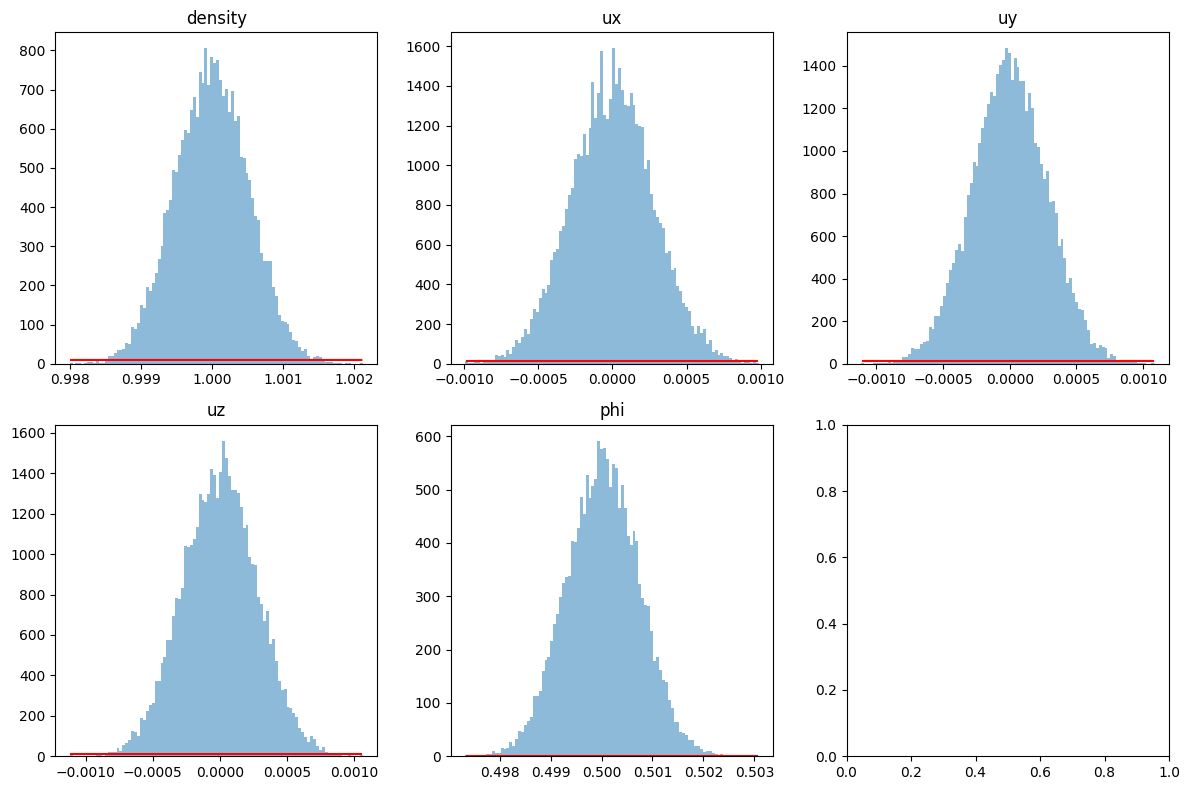

In [68]:
plist = ['density', 'ux', 'uy', 'uz', 'phi']#, 'mf4', 'mf16']

cols = 3
rows = (len(plist)+cols-1)//cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))

for ax, m in zip(axes.ravel(), plist):
    counts, bins = np.histogram(values[m].ravel(), bins=100, density=True)
    x = 0.5*(bins[1:]+bins[:-1])
    ax.bar(x, counts, width=x[1]-x[0], alpha=0.5)
    ax.plot(x, gaussian(x, meq[m], np.sqrt(covars[m])), color = 'red')
    ax.set_title(m)
fig.tight_layout()

### Distribution over lattice sites (at a single time step)

In [ ]:
plot = ['density', 'ux', 'uy', 'uz']

cols = 4
rows = (len(plot)+cols-1)//cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))

for ax, m in zip(axes.ravel(),plot):
    counts, bins = np.histogram(values[m][0,:], bins=100, density=True)
    x = 0.5*(bins[1:]+bins[:-1])
    ax.bar(x, counts, width=x[1]-x[0], alpha=0.5)
    ax.plot(x, gaussian(x, meq[m], np.sqrt(covars[m])))
    ax.set_title(m)
fig.tight_layout()

### Distribution over time (at a singe lattice site)

In [ ]:
plot = ['density', 'ux', 'uy', 'uz']

cols = 4
rows = (len(plot)+cols-1)//cols


fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
for ax, m in zip(axes.ravel(),plot):
    counts, bins = np.histogram(values[m][:,0], bins=100, density=True)
    x = 0.5*(bins[1:]+bins[:-1])
    ax.bar(x, counts, width=x[1]-x[0], alpha=0.5)
    ax.plot(x, gaussian(x, meq[m], np.sqrt(covars[m])), c='tab:blue')
    ax.set_title(m)
fig.tight_layout()

In [ ]:
plot = ['density', 'ux', 'uy', 'uz']

cols = 4
rows = (len(plot)+cols-1)//cols


fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
for ax, m in zip(axes.ravel(),plot):
    counts, bins = np.histogram(values[m].ravel(), bins=100, density=True)
    #counts = counts/np.sum(counts)
    x = 0.5*(bins[1:]+bins[:-1])
    ax.bar(x, counts, width=x[1]-x[0], alpha=0.5)
    ax.hist(values[m][0,:], bins=100, alpha=0.5, density=True)    
    ax.hist(values[m][:,0], bins=100, alpha=0.5, density=True)    
    ax.plot(x, gaussian(x, meq[m], np.sqrt(covars[m])), c='tab:blue')
    ax.set_title(m)
fig.tight_layout()

### Noise distribution

In [71]:
ts = yt.load('xi_plt*')

show = np.s_[:38]
steps = np.s_[-2:-1]

ds = ts[-1]

values = {}
for m in moments[show]:
    values[m] = []
    for ds in ts[steps]:
        values[m].append(ds.all_data()[m])
    values[m] = np.array(values[m])

l_p = 1.0
l_r = 1/(0.5*(1.+1./np.sqrt(3.)))
cs2k = T

variances = [0]*5 + [2*mobility*temperature*l_p/rho0]*3 + \
            [2*rho0*temperature*l_r*(5 - 9*cs2k)] + [8*rho0*temperature*l_r] + \
            [8/3*rho0*temperature*l_r] + [2/3*rho0*temperature*l_r]*3 + \
            [4*rho0*temperature*l_r]*3 + [4/3*rho0*temperature*l_r]*3 + \
            [18*rho0*temperature*l_r*(1-cs2k)] + [8*rho0*temperature*l_r] +\
            [8/3*rho0*temperature*l_r] + [2*mobility*temperature*l_p*(5 - 9*mobility*mu_phi)/rho0] +\
            [8*mobility*temperature*l_p/rho0] + [8/3*mobility*temperature*l_p/rho0] +\
            [2/3*mobility*temperature*l_p/rho0]*3 + [4*mobility*temperature*l_p/rho0]*3 +\
            [4/3*mobility*temperature*l_p/rho0]*3 + [18*mobility*temperature*l_p*(1 - mobility*mu_phi)/rho0] +\
            [8*mobility*temperature*l_p/rho0] + [8/3*mobility*temperature*l_p/rho0]

/tmp/ipykernel_2914851/4058538041.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(((x - mu)/sigma)**2)/2)/(np.sqrt(2.*np.pi)*sigma)
/tmp/ipykernel_2914851/4058538041.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(((x - mu)/sigma)**2)/2)/(np.sqrt(2.*np.pi)*sigma)


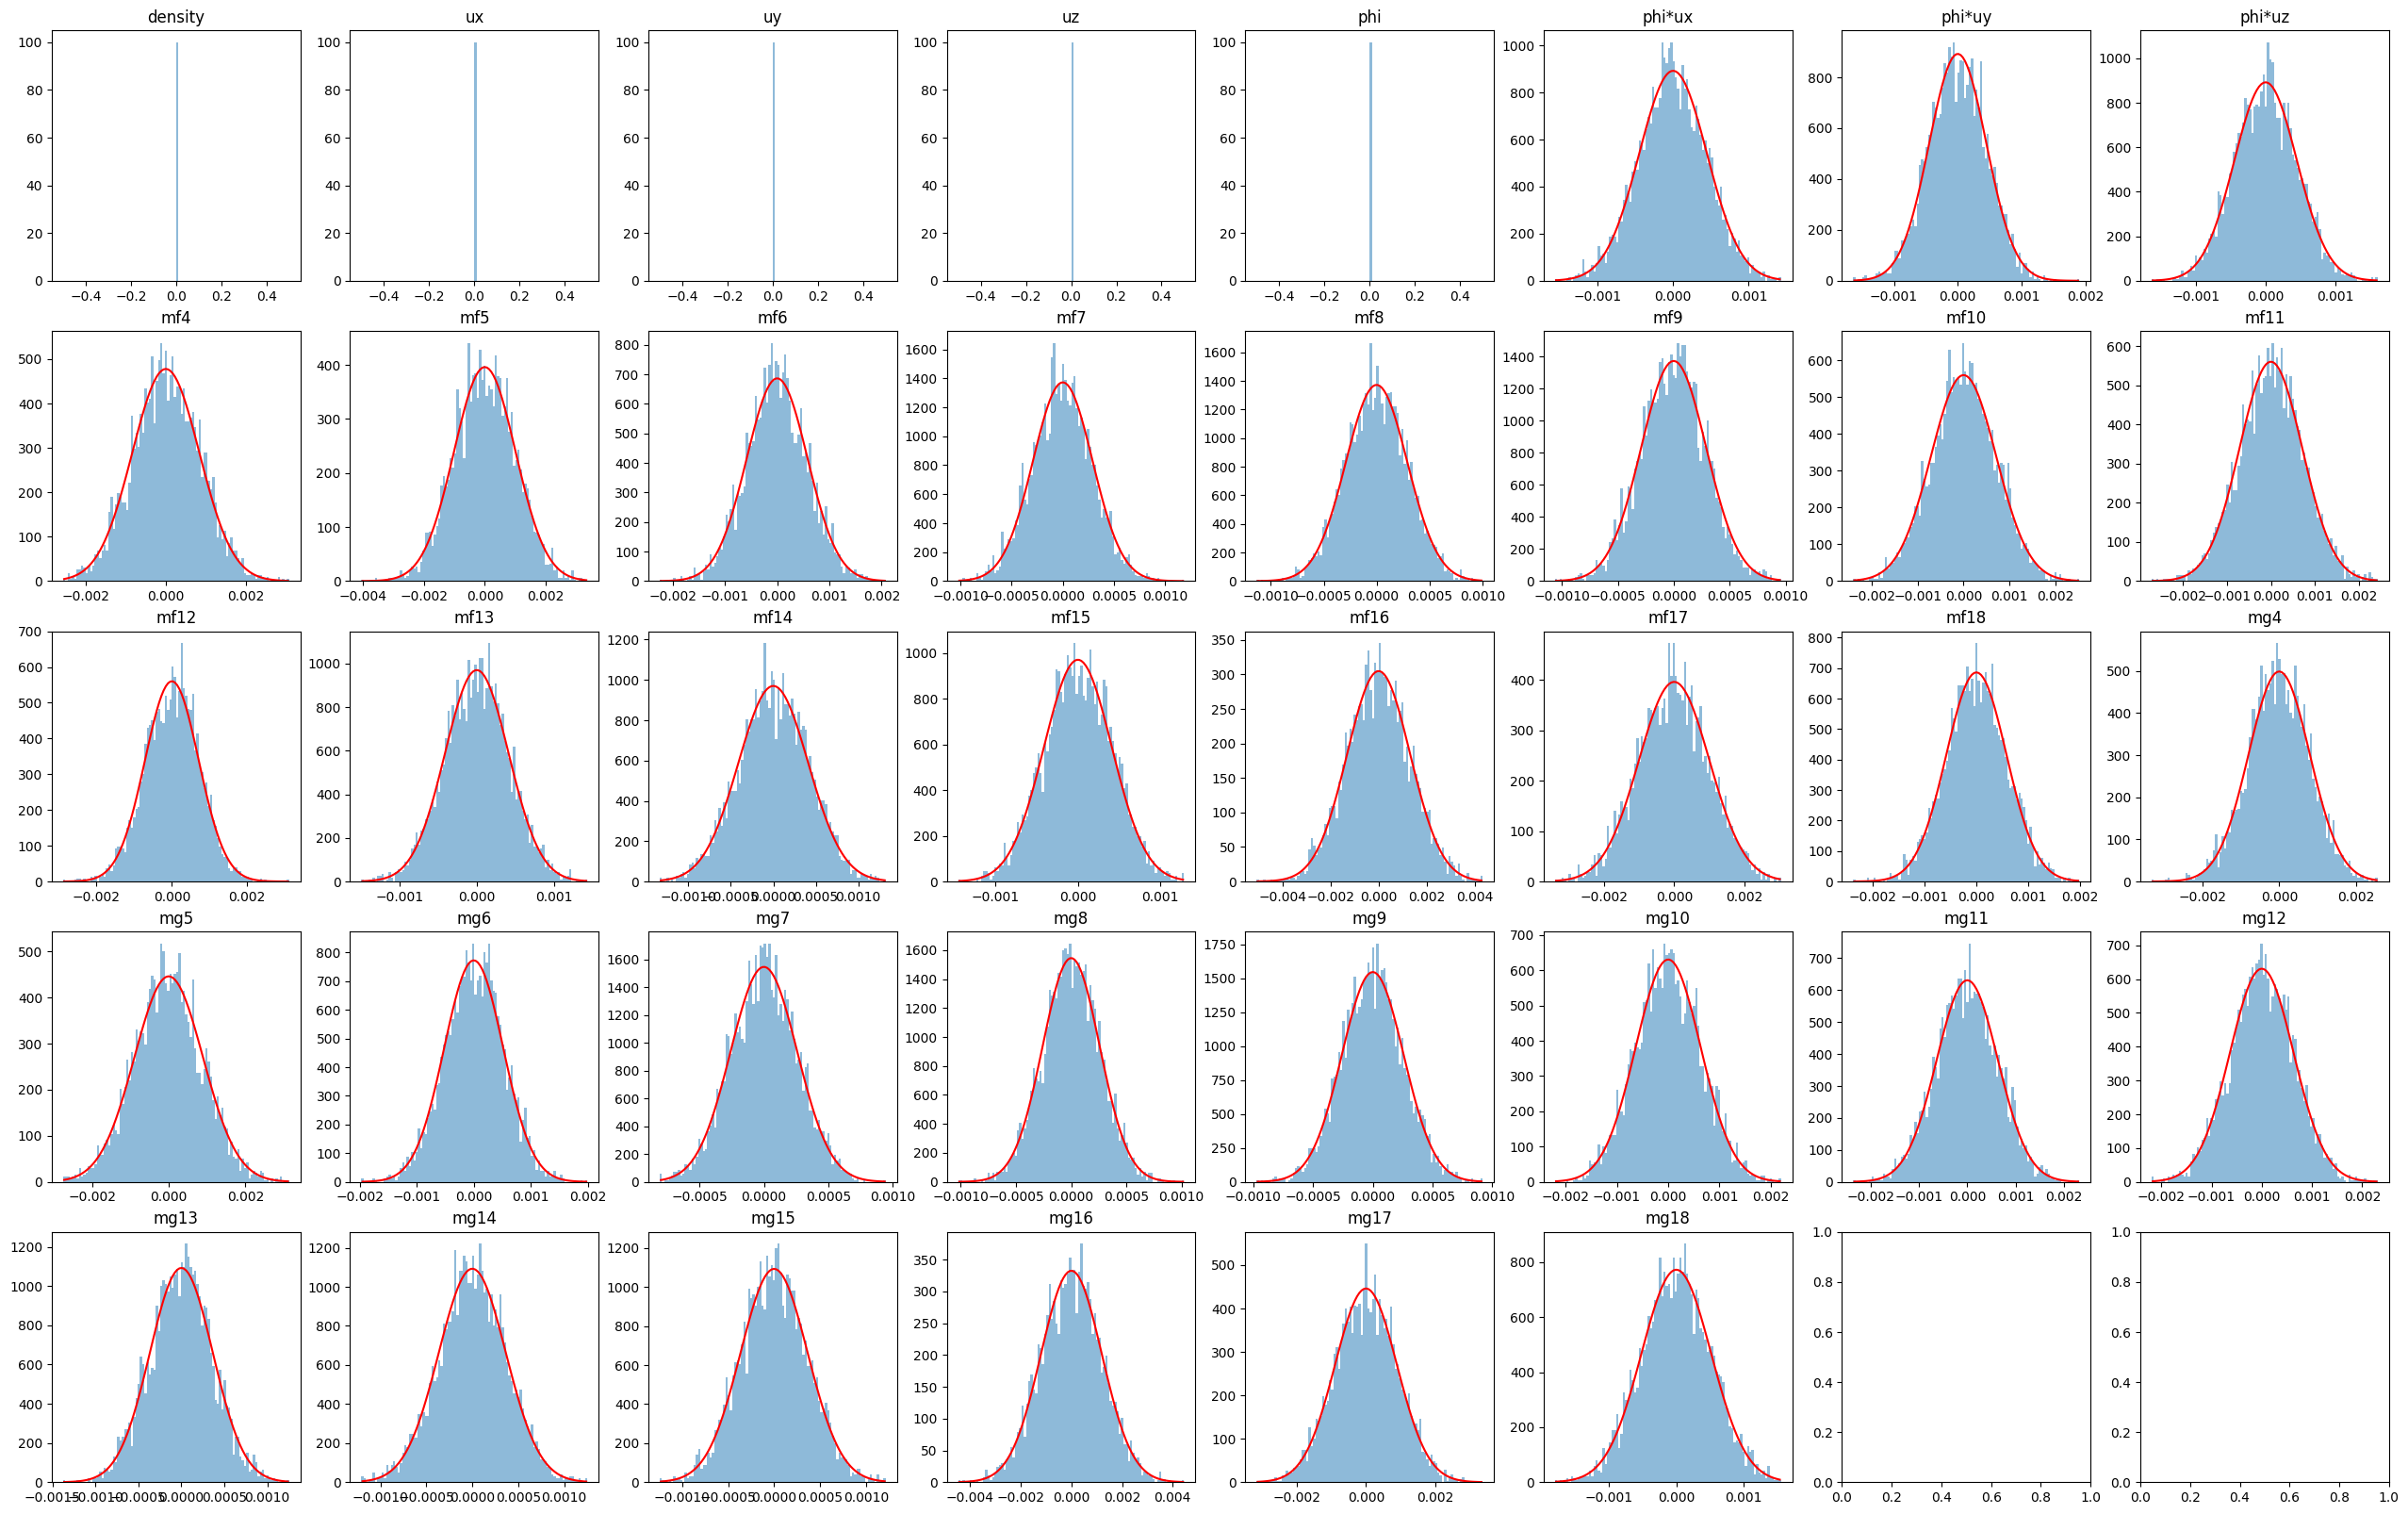

In [72]:
plist = moments

cols = 8
rows = (len(plist)+cols-1)//cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
idx = 0

for ax, m in zip(axes.ravel(), plist):
    counts, bins = np.histogram(values[m].ravel(), bins=100, density=True)
    x = 0.5*(bins[1:]+bins[:-1])
    ax.bar(x, counts, width=x[1]-x[0], alpha=0.5)

    ax.plot(x, gaussian(x, 0, np.sqrt(variances[idx])), color = 'red')
    ax.set_title(m)
    idx += 1